In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df = pd.read_csv("NVidia_stock_history.csv")
print(df.head())

                        Date      Open      High       Low     Close  \
0  1999-01-22 00:00:00-05:00  0.040129  0.044786  0.035590  0.037621   
1  1999-01-25 00:00:00-05:00  0.040607  0.042039  0.037621  0.041562   
2  1999-01-26 00:00:00-05:00  0.042039  0.042876  0.037740  0.038337   
3  1999-01-27 00:00:00-05:00  0.038457  0.039412  0.036307  0.038218   
4  1999-01-28 00:00:00-05:00  0.038218  0.038457  0.037859  0.038098   

       Volume  Dividends  Stock Splits  
0  2714688000        0.0           0.0  
1   510480000        0.0           0.0  
2   343200000        0.0           0.0  
3   244368000        0.0           0.0  
4   227520000        0.0           0.0  


In [ ]:
print(df.tail())
df.info()
# Find any Null Values
df.isnull().sum()

                           Date        Open        High         Low  \
6437  2024-08-22 00:00:00-04:00  130.020004  130.750000  123.099998   
6438  2024-08-23 00:00:00-04:00  125.860001  129.600006  125.220001   
6439  2024-08-26 00:00:00-04:00  129.570007  131.259995  124.370003   
6440  2024-08-27 00:00:00-04:00  125.050003  129.199997  123.879997   
6441  2024-08-28 00:00:00-04:00  128.119995  128.330002  122.639999   

           Close     Volume  Dividends  Stock Splits  
6437  123.739998  376189100        0.0           0.0  
6438  129.369995  323230300        0.0           0.0  
6439  126.459999  331964700        0.0           0.0  
6440  128.300003  301726100        0.0           0.0  
6441  125.175003  241795982        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6442 non-null   object 
 1   Ope

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [ ]:
data = df[['Close']].values  # use close price
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)
print(df.head())


                        Date      Open      High       Low     Close  \
0  1999-01-22 00:00:00-05:00  0.040129  0.044786  0.035590  0.037621   
1  1999-01-25 00:00:00-05:00  0.040607  0.042039  0.037621  0.041562   
2  1999-01-26 00:00:00-05:00  0.042039  0.042876  0.037740  0.038337   
3  1999-01-27 00:00:00-05:00  0.038457  0.039412  0.036307  0.038218   
4  1999-01-28 00:00:00-05:00  0.038218  0.038457  0.037859  0.038098   

       Volume  Dividends  Stock Splits  
0  2714688000        0.0           0.0  
1   510480000        0.0           0.0  
2   343200000        0.0           0.0  
3   244368000        0.0           0.0  
4   227520000        0.0           0.0  


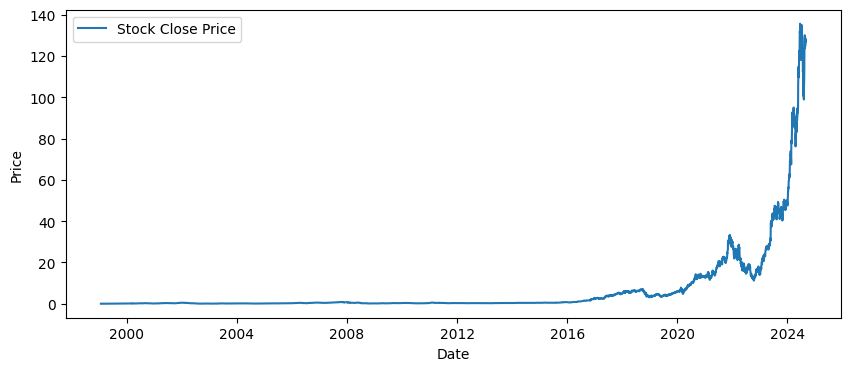

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['Close'], label="Stock Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
def create_sequences(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # using last 60 days to predict next day
X, y = create_sequences(data_scaled, time_step)

In [ ]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=64, verbose=1)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - loss: 7.9885e-05 - val_loss: 0.0012
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 203ms/step - loss: 8.2070e-07 - val_loss: 0.0011
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 216ms/step - loss: 7.3467e-07 - val_loss: 7.5859e-04
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 220ms/step - loss: 8.5846e-07 - val_loss: 6.4971e-04
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - loss: 7.2882e-07 - val_loss: 7.0420e-04
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - loss: 6.4255e-07 - val_loss: 8.4845e-04
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - loss: 7.3343e-07 - val_loss: 6.6885e-04
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - loss: 8.7342e-07 - val_loss: 4.9576e-04
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 236ms/step - loss: 6.7648e-07 - val_loss: 4.8953e-04
Epoch 10/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - loss: 6.7774e-07 - val_loss: 4.0588e-04
Epoch 11/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - l

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1,1))
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

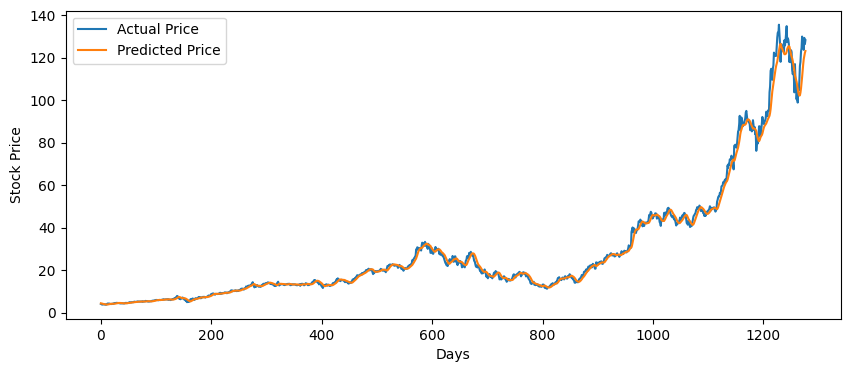

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(y_test_actual, label="Actual Price")
plt.plot(test_predict, label="Predicted Price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [ ]:
last_sequence = data_scaled[-time_step:]
last_sequence = last_sequence.reshape(1, time_step, 1)
next_price_scaled = model.predict(last_sequence)
next_price = scaler.inverse_transform(next_price_scaled)
print("Predicted Next Stock Price:", next_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted Next Stock Price: 124.09328


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])   # ✅ convert string → datetime


/tmp/ipython-input-802208473.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])   # ✅ convert string → datetime


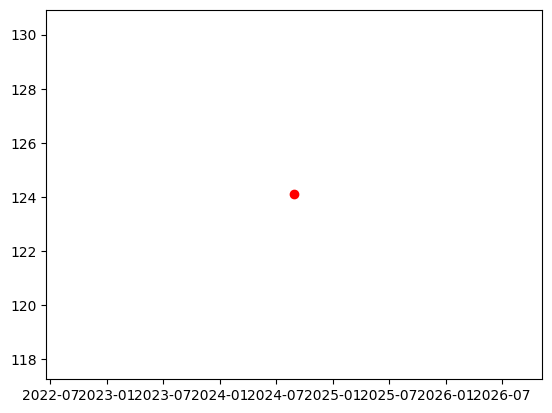

In [ ]:
# Add the predicted next price as a red dot
next_day = df['Date'].iloc[-1] + pd.Timedelta(days=1)   # next day after last date
plt.scatter(next_day, next_price[0][0], color="red", label="Predicted Next Price")


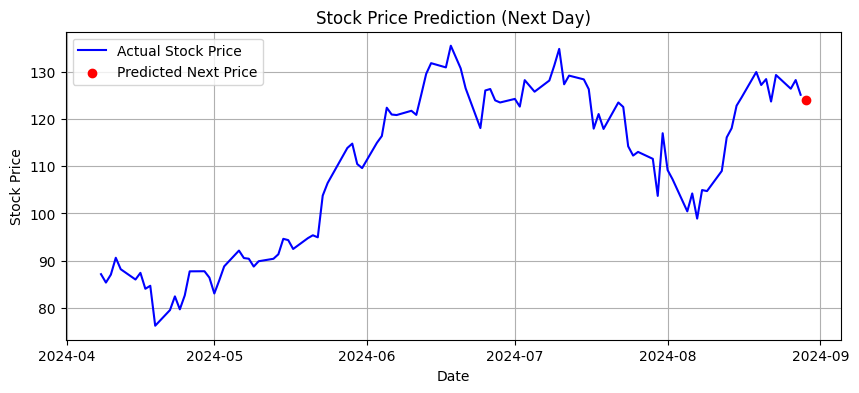

In [ ]:

# Plot the last 100 days of actual stock prices
plt.figure(figsize=(10,4))
plt.plot(df['Date'][-100:], df['Close'][-100:], label="Actual Stock Price", color="blue")

# Add the predicted next price as a red dot
next_day = df['Date'].iloc[-1] + pd.Timedelta(days=1)   # next day after last date
plt.scatter(next_day, next_price[0][0], color="red", label="Predicted Next Price")

# Formatting
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction (Next Day)")
plt.legend()
plt.grid(True)
plt.show()
